<a href="https://colab.research.google.com/github/muajnstu/Large_Scale_Implementation_of_DSK_Chain/blob/main/Employee_attrition_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/muajnstu/ML-Datasets/refs/heads/main/employee_attrition_data.csv")

In [ ]:
df

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,39,Female,HR,HR Specialist,3,0.377435,239,0,71403,0
996,996,50,Male,Engineering,Manager,1,0.431152,154,0,30181,1
997,997,52,Male,Engineering,Analyst,3,0.647102,206,0,64143,0
998,998,37,Female,HR,HR Specialist,2,0.304813,241,0,74383,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [ ]:
df.describe()

,Employee_ID,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,288.819436,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,0.000000,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,249.750000,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,499.500000,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,749.250000,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,999.000000,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


1. Basic Cleaning

In [ ]:
df = df.drop(['Employee_ID'], axis=1)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Department,0
Job_Title,0
Years_at_Company,0
Satisfaction_Level,0
Average_Monthly_Hours,0
Promotion_Last_5Years,0
Salary,0
Attrition,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
for col in df.columns:
    print(f"Unique values in column '{col}':")
    if df[col].nunique() < 50:
        print(df[col].unique())
    else:
        print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 30)

Unique values in column 'Age':
[27 53 59 42 44 47 58 57 34 50 39 41 29 28 45 32 46 55 52 37 30 25 36 35
 38 43 40 31 51 26 48 54 49 33 56]
------------------------------
Unique values in column 'Gender':
['Male' 'Female']
------------------------------
Unique values in column 'Department':
['Marketing' 'Sales' 'Engineering' 'Finance' 'HR']
------------------------------
Unique values in column 'Job_Title':
['Manager' 'Engineer' 'Analyst' 'HR Specialist' 'Accountant']
------------------------------
Unique values in column 'Years_at_Company':
[ 9 10  8  1  5  6  7  3  4  2]
------------------------------
Unique values in column 'Satisfaction_Level':
Number of unique values: 1000
------------------------------
Unique values in column 'Average_Monthly_Hours':
Number of unique values: 100
------------------------------
Unique values in column 'Promotion_Last_5Years':
[0 1]
------------------------------
Unique values in column 'Salary':
Number of unique values: 995
-------------------------

In [ ]:
gender_mapping = {'Male': 1, 'Female': 0}
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].map(gender_mapping)

department_mapping = {'Marketing': 0, 'Sales': 1, 'Engineering': 2, 'Finance': 3, 'HR': 4}
df_encoded['Department'] = df_encoded['Department'].map(department_mapping)

job_title_mapping = {'Manager': 0, 'Engineer': 1, 'Analyst': 2, 'HR Specialist': 3, 'Accountant': 4}
df_encoded['Job_Title'] = df_encoded['Job_Title'].map(job_title_mapping)

In [ ]:
df_encoded.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,1,0,0,9,0.586251,151,0,60132,0
1,53,0,1,1,10,0.261161,221,1,79947,0
2,59,0,0,2,8,0.304382,184,0,46958,1
3,42,0,2,0,1,0.480779,242,0,40662,0
4,44,0,1,1,10,0.636244,229,1,74307,0


Instead of mapping function one can also use Label encoder. Both have same functionality

In [ ]:
#le = LabelEncoder()
#df_encoded = df.copy()
#df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])

#df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)
#df_encoded = df_encoded.astype({col: int for col in df_encoded.columns if df_encoded[col].dtype == bool})

#df_encoded.head()

2. Feature Visualization

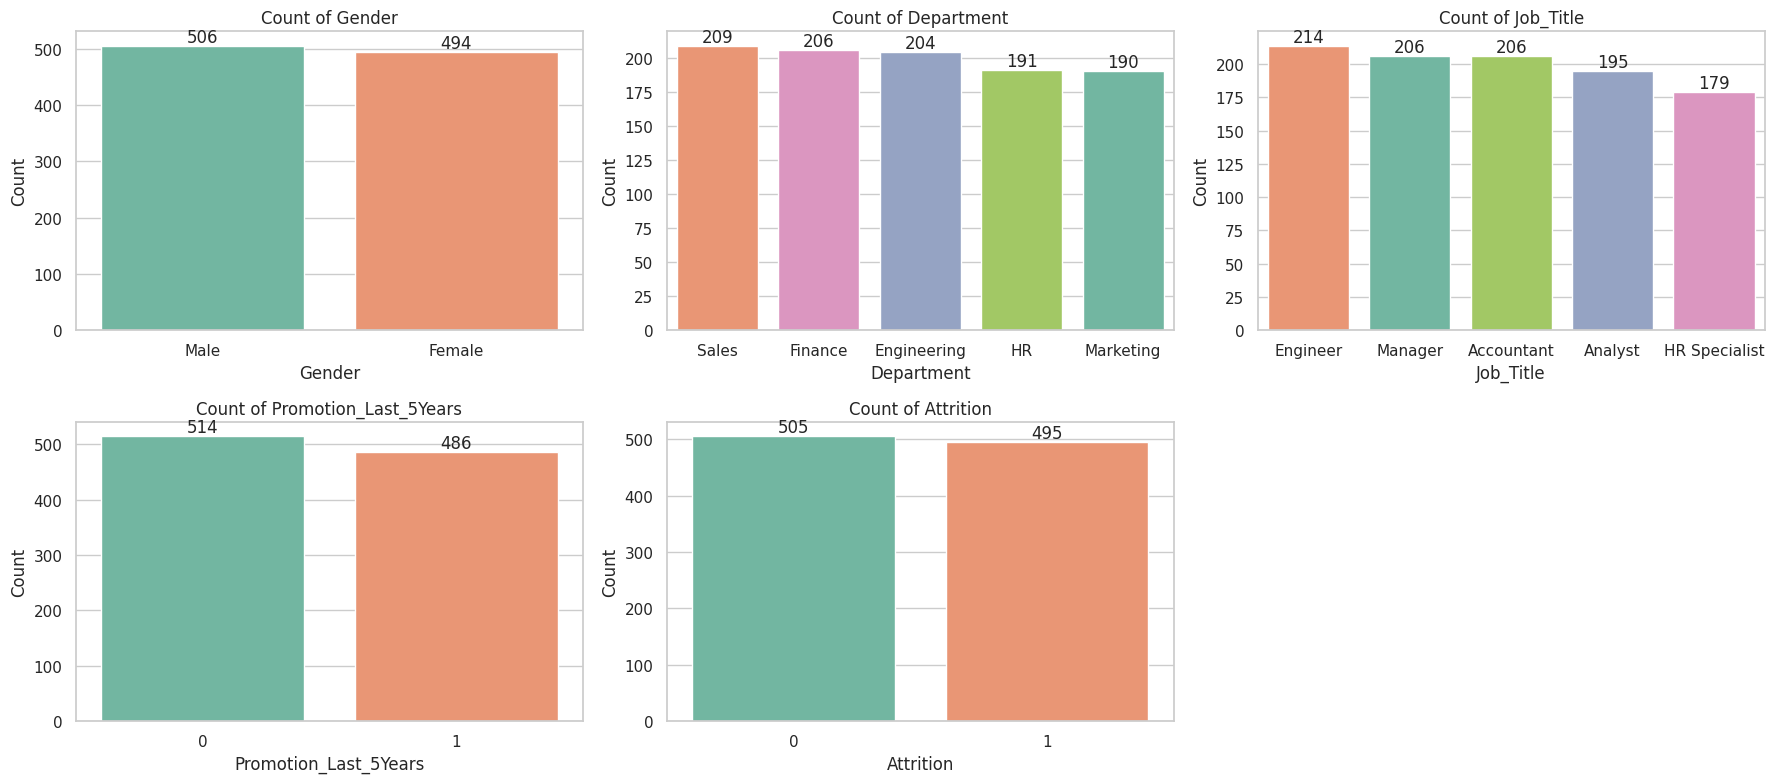

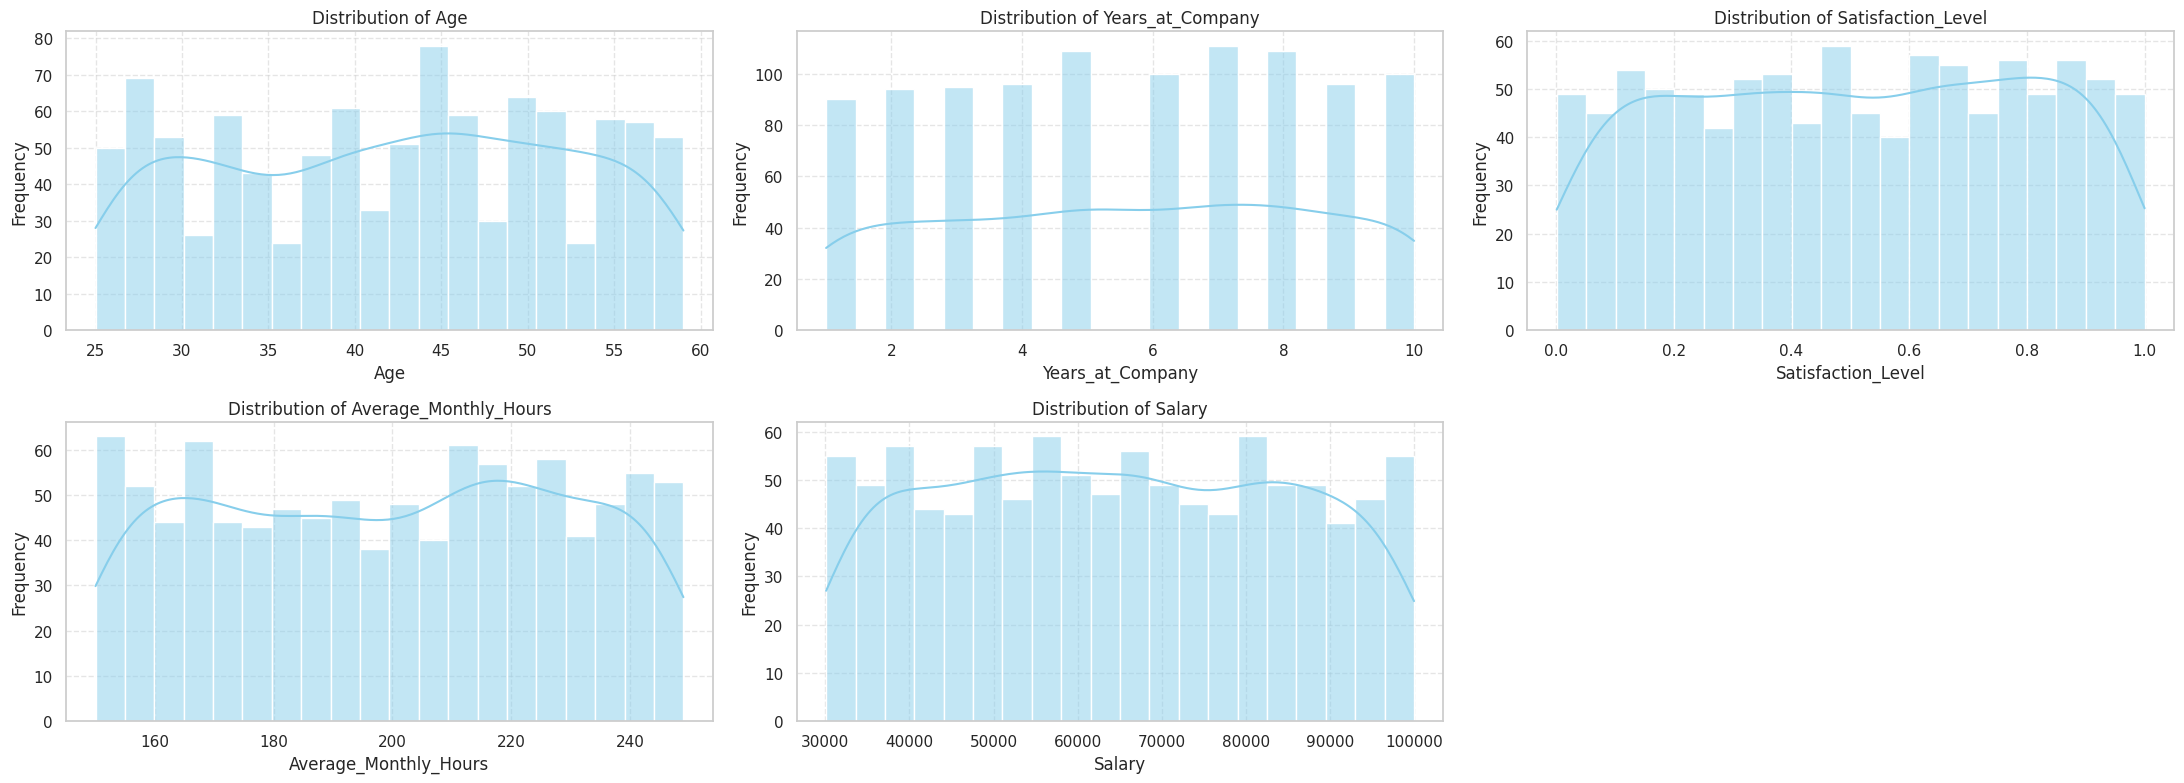

In [ ]:
sns.set(style="whitegrid")

categorical_cols = [
    'Gender', 'Department', 'Job_Title', 'Promotion_Last_5Years', 'Attrition'
]

n_cat = len(categorical_cols)
ncols = 3
nrows = (n_cat + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    order = df[col].value_counts().index if df[col].nunique() < 10 else sorted(df[col].unique())
    ax = axes[i]
    sns.countplot(data=df, x=col, hue=col, order=order, ax=ax, palette="Set2", legend=False)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')
    if df[col].nunique() > 5:
        plt.setp(ax.get_xticklabels(), rotation=30, ha='right')  # <--- Updated line


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

numerical_cols = [
   'Age', 'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours', 'Salary'
]

n_num = len(numerical_cols)
ncols_num = 3
nrows_num = (n_num + ncols_num - 1) // ncols_num

fig, axes = plt.subplots(nrows_num, ncols_num, figsize=(22, nrows_num * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(df[col].dropna(), bins=20, kde=True, color='skyblue', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observation: There are almost perfect distribution of different values in each column. Therefore, we don't need to remove any of them.

3. Spearman and Pearson Correlation

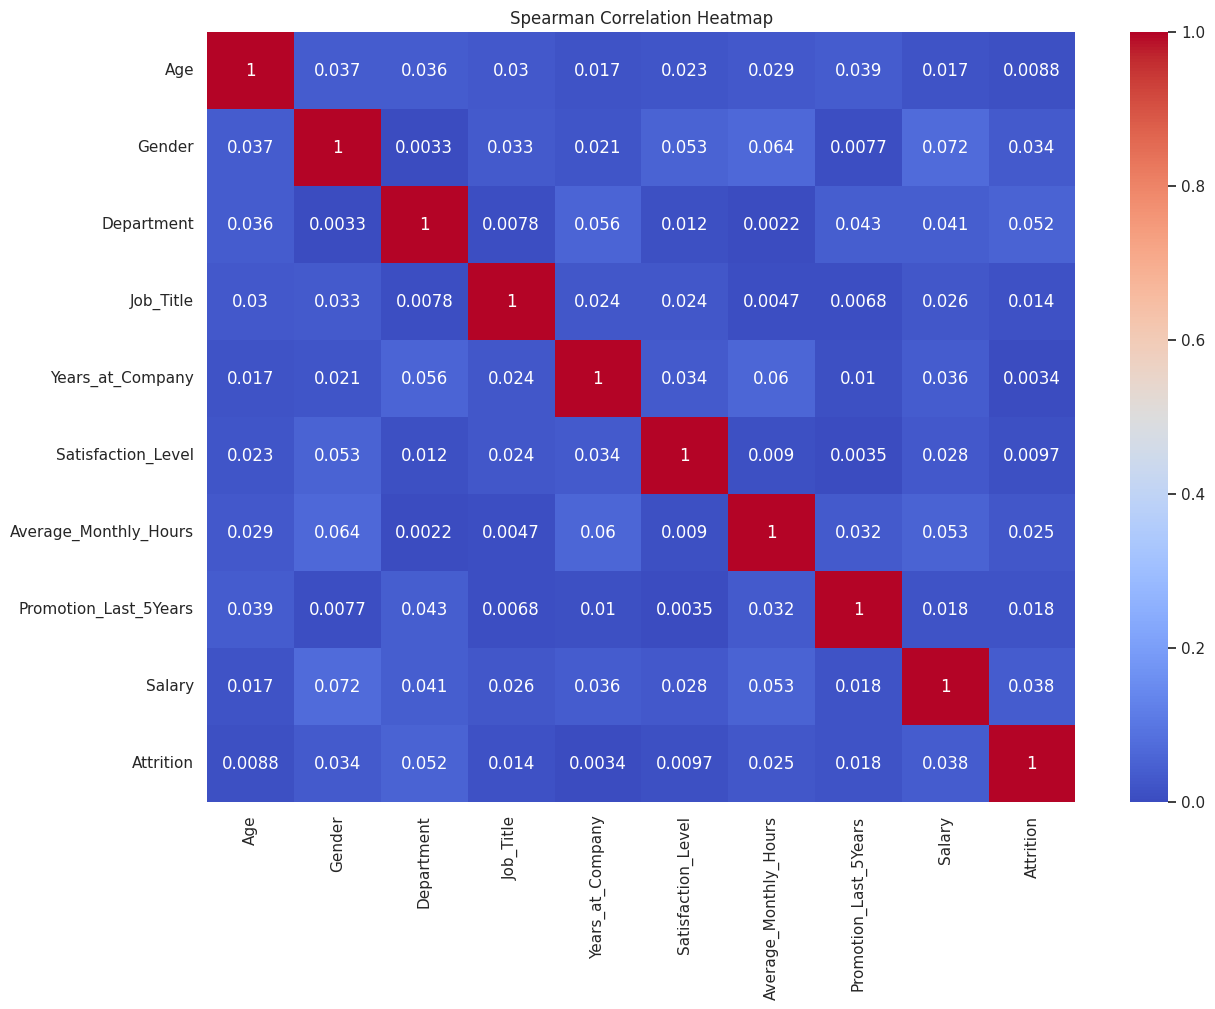

In [ ]:
corr_matrix = df_encoded.corr('spearman').abs()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [ ]:
threshold = 0.8

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(column, row, upper[column][row])
             for column in upper.columns for row in upper.index
             if upper[column][row] > threshold]

print("Highly correlated pairs (|Spearman| > {}):".format(threshold))
for col1, col2, corr_val in high_corr:
    print(f"{col1} and {col2}: correlation = {corr_val:.2f}")

Highly correlated pairs (|Spearman| > 0.8):


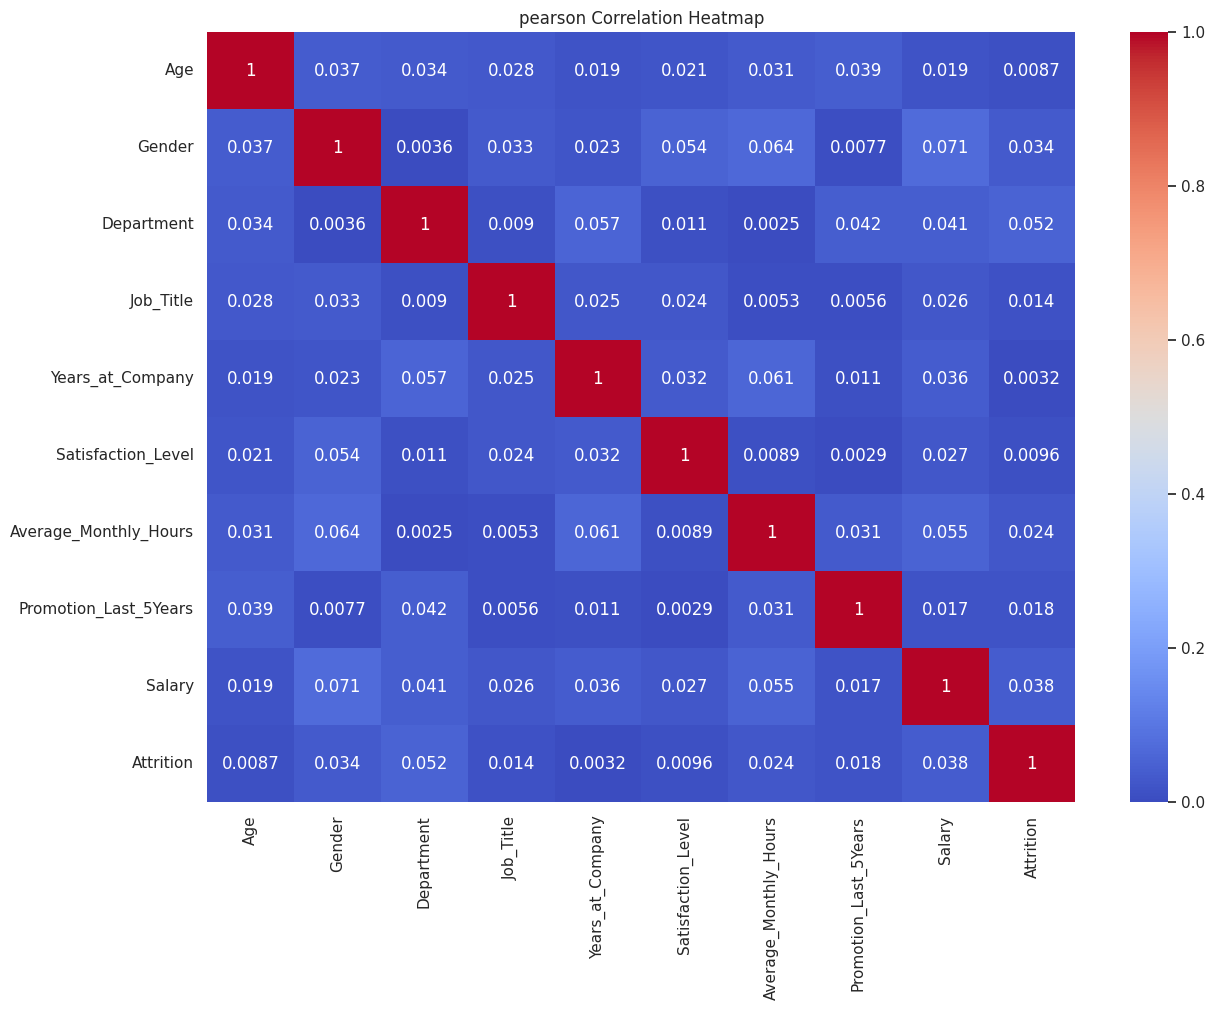

In [ ]:
corr_matrix = df_encoded.corr().abs()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("pearson Correlation Heatmap")
plt.show()

In [ ]:
threshold = 0.8

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(column, row, upper[column][row])
             for column in upper.columns for row in upper.index
             if upper[column][row] > threshold]

print("Highly correlated pairs (|Pearson| > {}):".format(threshold))
for col1, col2, corr_val in high_corr:
    print(f"{col1} and {col2}: correlation = {corr_val:.2f}")

Highly correlated pairs (|Pearson| > 0.8):


No Highly Correlated pairs found.

In [ ]:

numerical_df = df.select_dtypes(include=np.number)
variances = numerical_df.var()
print("Feature Variances:")
display(variances)

# Set a variance threshold (you can adjust this value)
variance_threshold = 0.01

# Identify numerical features with variance below the threshold
low_variance_numerical_features = variances[variances < variance_threshold].index.tolist()

print(f"\nNumerical features with variance below {variance_threshold}:")
print(low_variance_numerical_features)


if low_variance_numerical_features:
    df = df.drop(columns=low_variance_numerical_features)
    print(f"\nDropped low variance numerical columns: {low_variance_numerical_features}")
else:
    print("\nNo numerical features found with variance below the threshold.")


display(df.info())

Feature Variances:


,0
Age,1.003293e+02
Years_at_Company,7.964940e+00
Satisfaction_Level,8.398213e-02
Average_Monthly_Hours,8.780500e+02
Promotion_Last_5Years,2.500541e-01
Salary,4.105885e+08
Attrition,2.502252e-01



Numerical features with variance below 0.01:
[]

No numerical features found with variance below the threshold.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Department             1000 non-null   object 
 3   Job_Title              1000 non-null   object 
 4   Years_at_Company       1000 non-null   int64  
 5   Satisfaction_Level     1000 non-null   float64
 6   Average_Monthly_Hours  1000 non-null   int64  
 7   Promotion_Last_5Years  1000 non-null   int64  
 8   Salary                 1000 non-null   int64  
 9   Attrition              1000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB


None

In [ ]:
df_encoded.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,1,0,0,9,0.586251,151,0,60132,0
1,53,0,1,1,10,0.261161,221,1,79947,0
2,59,0,0,2,8,0.304382,184,0,46958,1
3,42,0,2,0,1,0.480779,242,0,40662,0
4,44,0,1,1,10,0.636244,229,1,74307,0


In [ ]:
df_encoded.to_csv("Processed_Credit_Employee attrition.csv", index=False)